In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv('TATASTEEL.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [3]:
data=data.drop(columns=['Series','Symbol','Prev Close','Turnover','Trades','Deliverable Volume','%Deliverble'])

In [4]:
data.head(2)

,Date,Open,High,Low,Last,Close,VWAP,Volume
0,2000-01-03,148.0,153.2,146.10,152.50,152.45,150.92,2003185
1,2000-01-04,150.1,153.0,143.05,151.95,150.80,151.03,1555136


In [15]:
data['Date']=pd.to_datetime(data['Date'])
#data.set_index('Date',inplace=True)
data.head()

,Date,Open,High,Low,Last,Close,VWAP,Volume
0,2000-01-03,148.00,153.2,146.10,152.50,152.45,150.92,2003185
1,2000-01-04,150.10,153.0,143.05,151.95,150.80,151.03,1555136
2,2000-01-05,144.60,162.9,144.60,158.00,156.55,156.85,3840284
3,2000-01-06,158.95,169.1,158.95,169.00,168.25,167.61,2560449
4,2000-01-07,173.40,179.0,166.30,170.55,171.95,173.89,3641691


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5059 non-null   datetime64[ns]
 1   Open    5059 non-null   float64       
 2   High    5059 non-null   float64       
 3   Low     5059 non-null   float64       
 4   Last    5059 non-null   float64       
 5   Close   5059 non-null   float64       
 6   VWAP    5059 non-null   float64       
 7   Volume  5059 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 316.3 KB


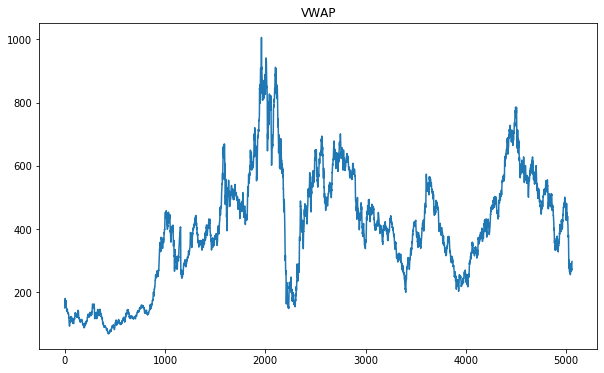

In [7]:
data['VWAP'].plot(figsize=(10,6),title='VWAP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D775EBD2C8>,
      dtype=object)

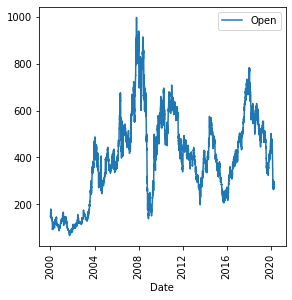

In [8]:
data.plot(x='Date',y='Open', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7761CF1C8>,
      dtype=object)

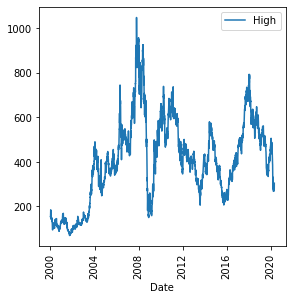

In [9]:
data.plot(x='Date',y='High', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False,rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7764989C8>,
      dtype=object)

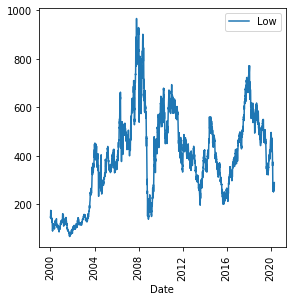

In [10]:
data.plot(x='Date',y='Low', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7767CEA48>,
      dtype=object)

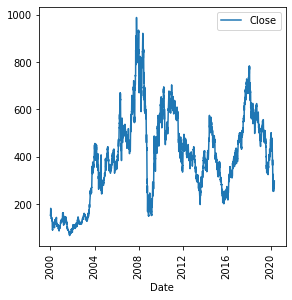

In [11]:
data.plot(x='Date',y='Close', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, rot = 90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D776A80908>,
      dtype=object)

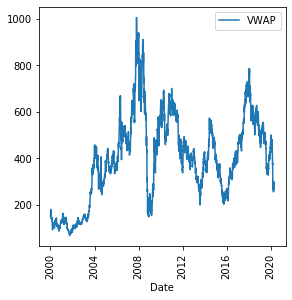

In [13]:
data.plot(x='Date',y='VWAP', subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, rot = 90)

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekDay'] = data['Date'].dt.weekday

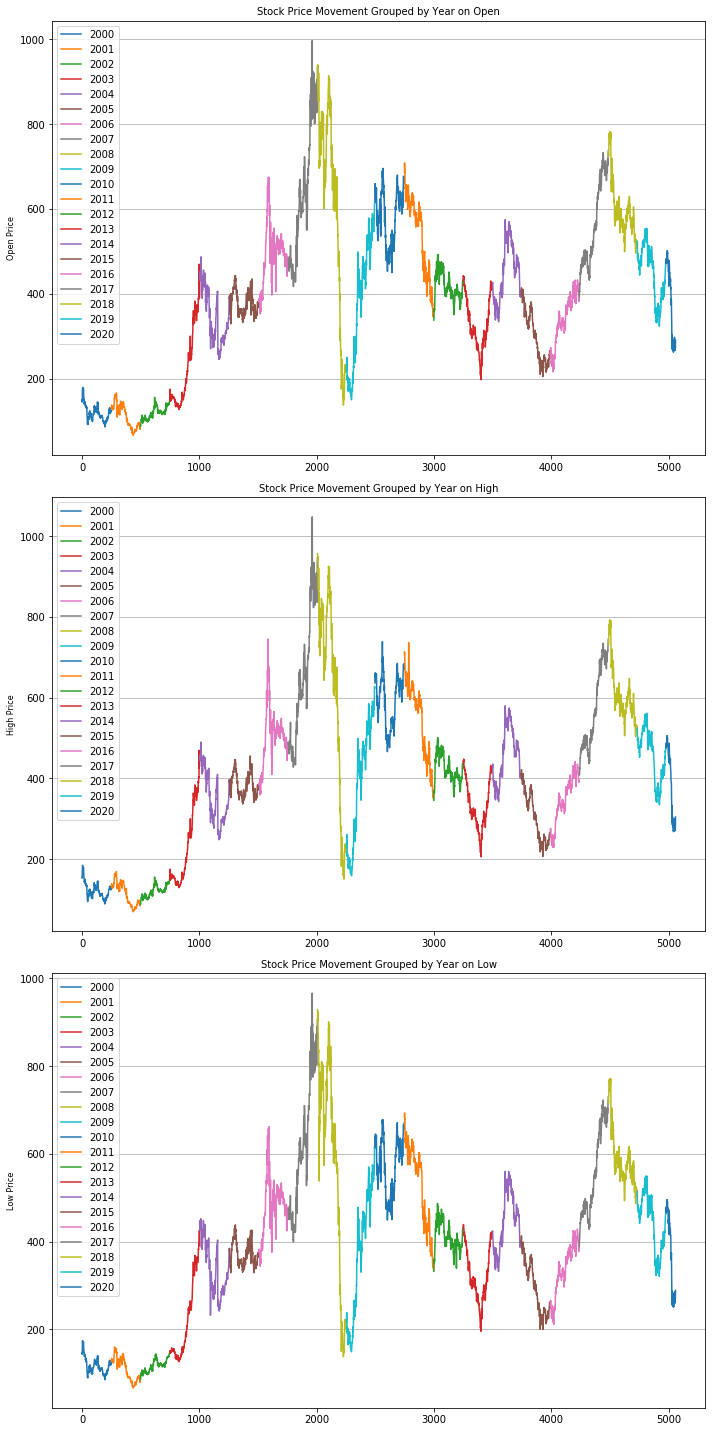

In [18]:
Column_List = ['Open', 'High', 'Low']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

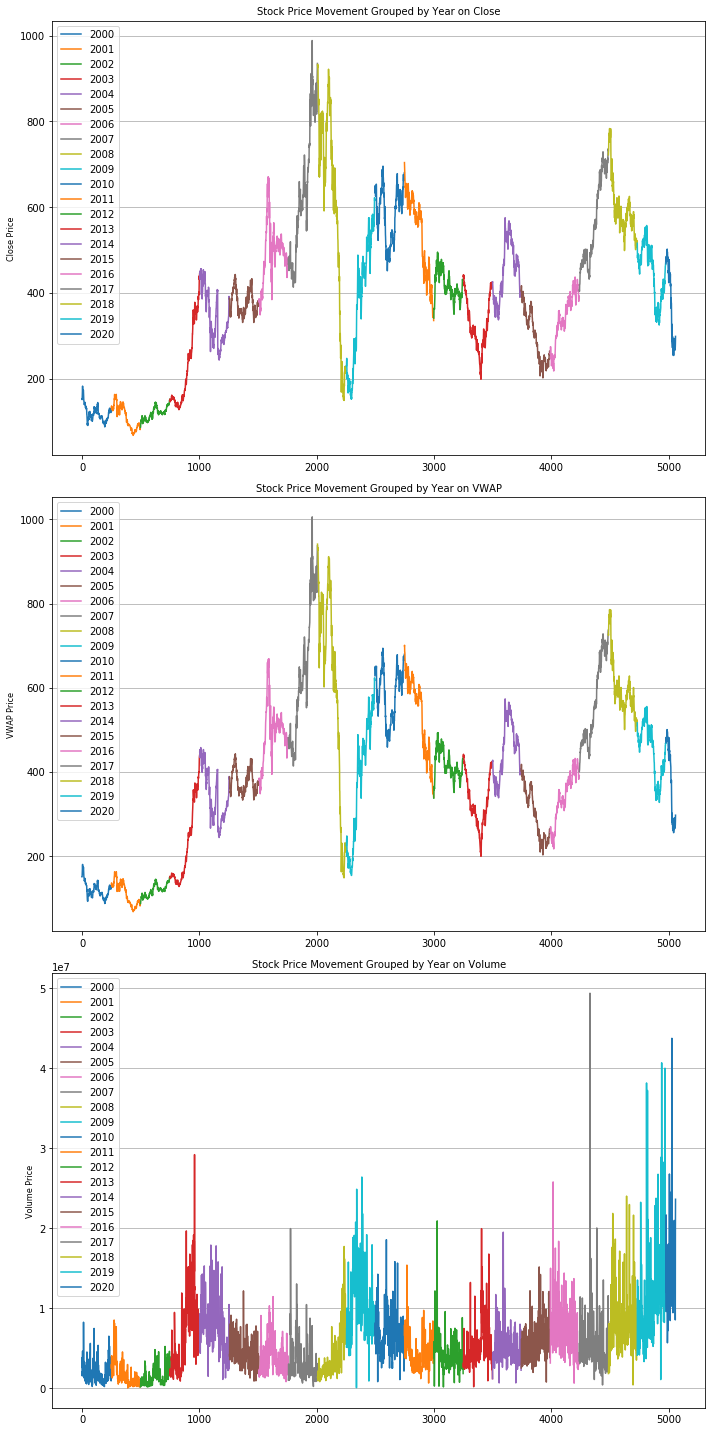

In [19]:
Column_List = ['Close', 'VWAP', 'Volume']
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))
for i, col_list in enumerate(Column_List):
    data.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True)

Manipulating Datetime

In [38]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [39]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [40]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [41]:
print(data.index.max())
print(data.index.min())

5058
0


In [42]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  5058


Temporally Subset Data Using Pandas Dataframes

In [38]:
df_vwap = data[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)


In [24]:
df_vwap.set_index("Date", inplace = True)
df_vwap.head()

,VWAP
Date,
2000-01-03,150.92
2000-01-04,151.03
2000-01-05,156.85
2000-01-06,167.61
2000-01-07,173.89


In [25]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

#  Visualizing Time-series Data

Visualizing using markers

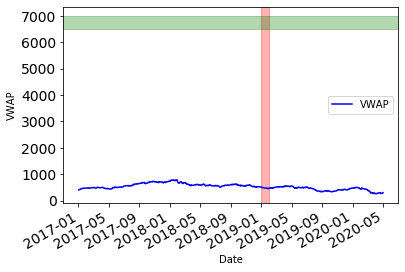

In [26]:
ax = vwap_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

Visualising KDEs

        Summarizing the data with Density plots to see where the mass of the data is located

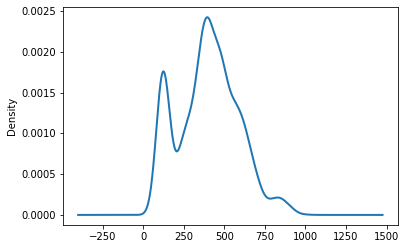

In [27]:
df_vwap['VWAP'].plot(kind='density',linewidth=2)

 Visualising Lineplots

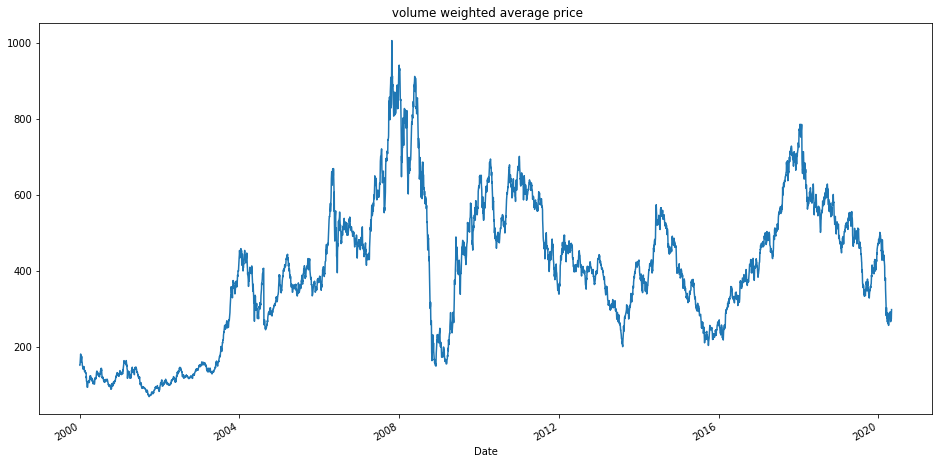

In [28]:
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')


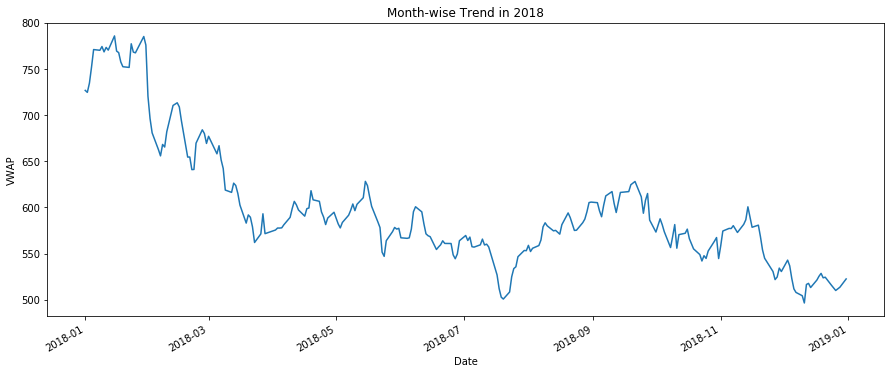

In [29]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');

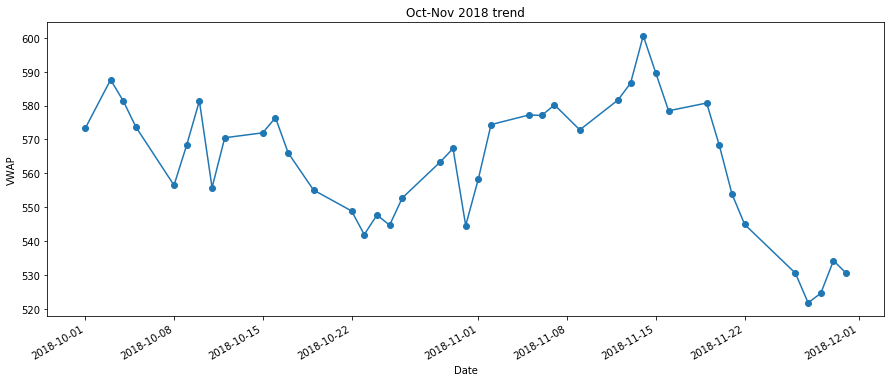

In [30]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');

 Feature Extraction

In [39]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek
df_vwap['Weekday Name'] = df_vwap.Date.dt.day_name()

In [40]:
#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,index,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,,
2000-01-03,0,150.92,2000,1,3,0,Monday
2000-01-04,1,151.03,2000,1,4,1,Tuesday
2000-01-05,2,156.85,2000,1,5,2,Wednesday
2000-01-06,3,167.61,2000,1,6,3,Thursday
2000-01-07,4,173.89,2000,1,7,4,Friday


In [41]:
df_vwap=df_vwap.drop(columns=['index'])

In [42]:
df_vwap.head(2)

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2000-01-03,150.92,2000,1,3,0,Monday
2000-01-04,151.03,2000,1,4,1,Tuesday


Time resampling:

Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

In [43]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2000-12-31,119.174880,2000.0,6.536000,15.888000,2.004000
2001-12-31,111.395403,2001.0,6.439516,15.778226,1.971774
2002-12-31,118.685817,2002.0,6.446215,15.745020,2.003984
2003-12-31,221.421575,2003.0,6.555118,15.854331,2.007874
2004-12-31,343.467795,2004.0,6.559055,15.708661,2.047244


Text(0.5, 1.0, 'Yearly Mean VWAP for Tata Steel')

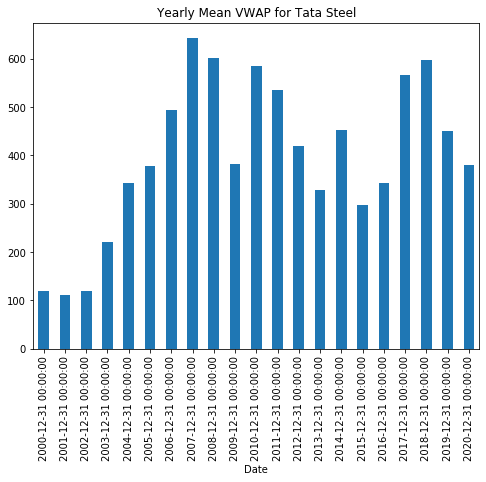

In [44]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Tata Steel')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Tata Steel')

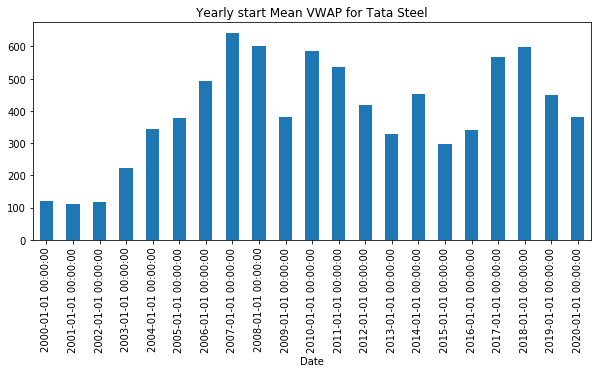

In [66]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Tata Steel')

Time Shifting

In [67]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,150.92,2000.0,1.0,3.0,0.0,Monday
2000-01-05,151.03,2000.0,1.0,4.0,1.0,Tuesday
2000-01-06,156.85,2000.0,1.0,5.0,2.0,Wednesday
2000-01-07,167.61,2000.0,1.0,6.0,3.0,Thursday


Backwards Shifting

In [68]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2000-01-03,151.03,2000.0,1.0,4.0,1.0,Tuesday
2000-01-04,156.85,2000.0,1.0,5.0,2.0,Wednesday
2000-01-05,167.61,2000.0,1.0,6.0,3.0,Thursday
2000-01-06,173.89,2000.0,1.0,7.0,4.0,Friday
2000-01-07,180.32,2000.0,1.0,10.0,0.0,Monday


In [69]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2000-03-31,150.92,2000,1,3,0,Monday
2000-03-31,151.03,2000,1,4,1,Tuesday
2000-03-31,156.85,2000,1,5,2,Wednesday
2000-03-31,167.61,2000,1,6,3,Thursday
2000-03-31,173.89,2000,1,7,4,Friday


 Rolling windows

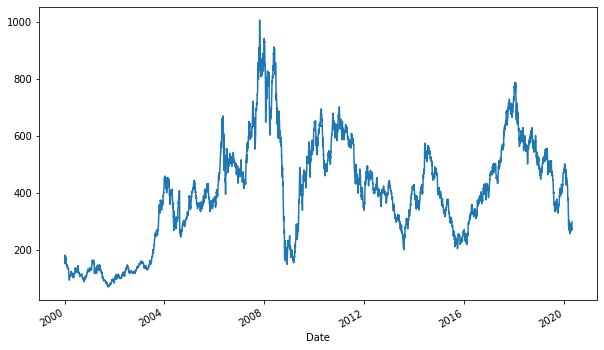

In [70]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [71]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN
2000-01-11,164.515714,2000.0,1.0,6.571429,1.571429
2000-01-12,166.582857,2000.0,1.0,7.857143,1.857143
2000-01-13,168.292857,2000.0,1.0,9.142857,2.142857


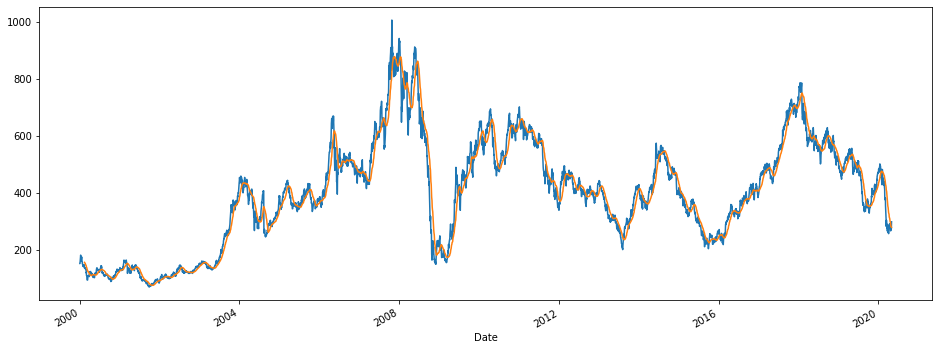

In [72]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

The blue line is the original open price data. The red line represents the 30-day rolling window, and has less noise than the orange line. Something to keep in mind is that once we run this code, the first 29 days aren’t going to have the blue line because there wasn’t enough data to actually calculate that rolling mean.

In [73]:
#Checking for missing values
df_vwap.isnull().sum()

VWAP            0
year            0
month           0
day             0
day of week     0
Weekday Name    0
dtype: int64

In [2]:
from fbprophet import Prophet

In [3]:
data=pd.read_csv('TATASTEEL.csv')

In [4]:
data=data.drop(columns=['Open','High','Low','Close','Volume','Symbol','Series','Prev Close','Last','Turnover','Trades','Deliverable Volume','%Deliverble'])

In [5]:
data=data.rename(columns={'Date':'ds'})
data=data.rename(columns={'VWAP':'y'})
data

,ds,y
0,2000-01-03,150.92
1,2000-01-04,151.03
2,2000-01-05,156.85
3,2000-01-06,167.61
4,2000-01-07,173.89
...,...,...
5054,2020-04-24,269.75
5055,2020-04-27,273.40
5056,2020-04-28,272.50
5057,2020-04-29,281.77


In [6]:
m=Prophet()
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
predper = 60

In [8]:
future = m.make_future_dataframe(periods=predper)
future.tail()

,ds
5114,2020-06-25
5115,2020-06-26
5116,2020-06-27
5117,2020-06-28
5118,2020-06-29


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5114,2020-06-25,546.767669,426.213367,664.238508
5115,2020-06-26,544.876524,426.647409,661.923888
5116,2020-06-27,549.804540,421.724799,666.231514
5117,2020-06-28,501.989175,382.698340,619.027908
5118,2020-06-29,545.191408,424.926154,661.588519


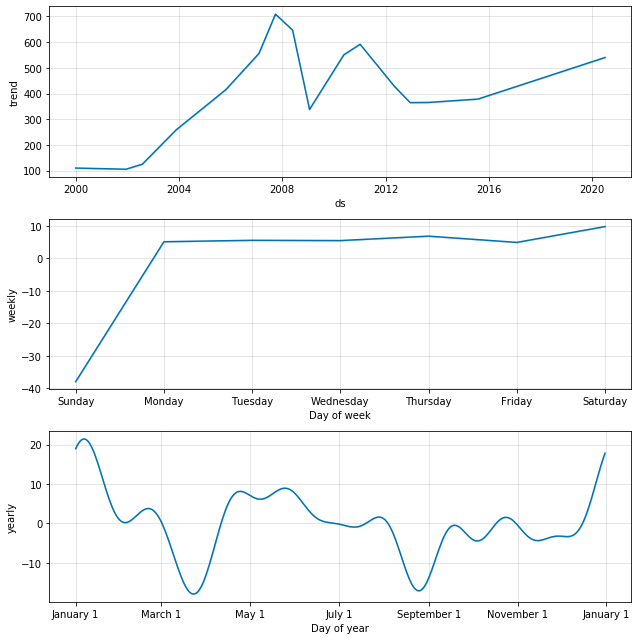

In [10]:
fig2 = m.plot_components(forecast)

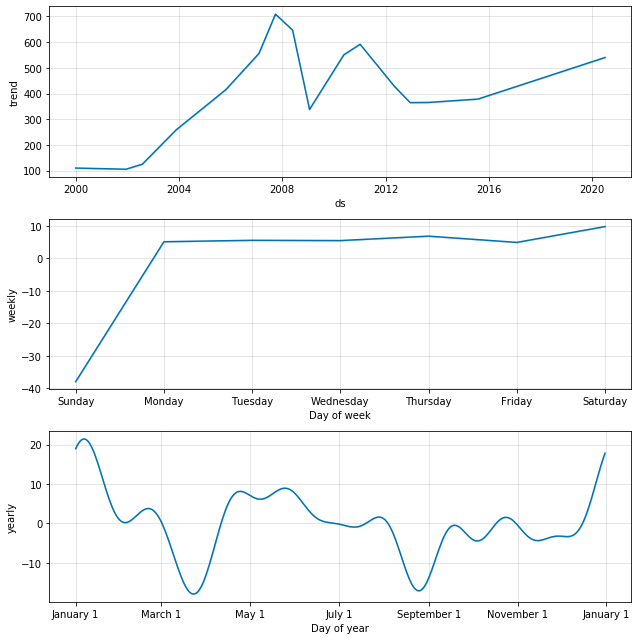

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [13]:
df_cv = cross_validation(m, initial='400 days', period='200 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 34 forecasts with cutoffs between 2001-04-05 00:00:00 and 2019-05-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2001-04-06,139.867225,132.610846,147.163894,123.67,2001-04-05
1,2001-04-09,140.969110,133.845617,148.151922,126.42,2001-04-05
2,2001-04-10,140.304684,132.398588,148.254941,126.30,2001-04-05
3,2001-04-11,141.779590,134.661521,149.013666,123.66,2001-04-05
4,2001-04-12,142.555620,135.507041,150.441920,116.56,2001-04-05


In [14]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,20915.808326,144.622987,101.866203,0.256909,0.176983,0.401183
1,38 days,21055.788032,145.106127,102.585788,0.257274,0.181397,0.399193
2,39 days,21480.581845,146.562553,103.875316,0.261653,0.182820,0.394906
3,40 days,21859.946387,147.851095,105.257384,0.265319,0.183097,0.389349
4,41 days,22286.476210,149.286557,106.600039,0.268952,0.187566,0.384784


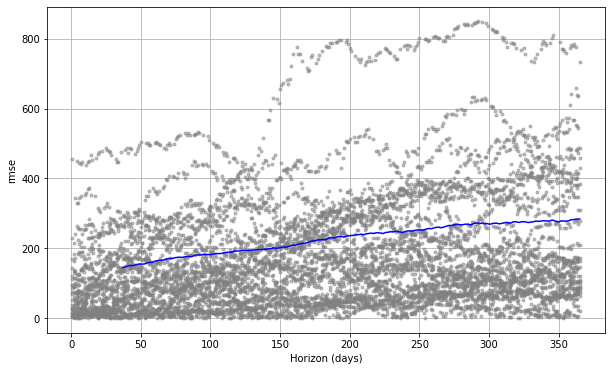

In [15]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')